In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

# K-means

### 1. 랜덤하게 데이터 포인트 할당
### 2. 가장 가까운 데이터 포인트로 클러스터 구성
### 3. 클러스터의 중심 위치에 데이터 포인트 할당. -> 데이터 포인트에 변화가 있으면 2번으로 이동해서 반복

### K-means 알고리즘은 거리를 기반으로 한다.
### 따라서 원형 형태의 클러스터만을 인식할 수 있다.

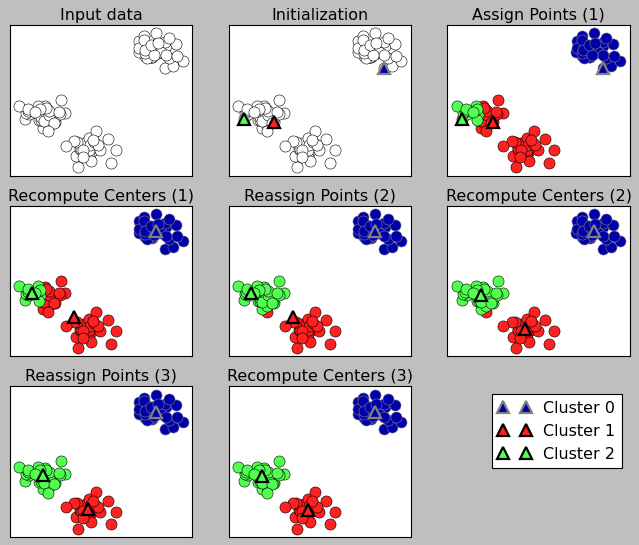

In [3]:
mglearn.plots.plot_kmeans_algorithm()

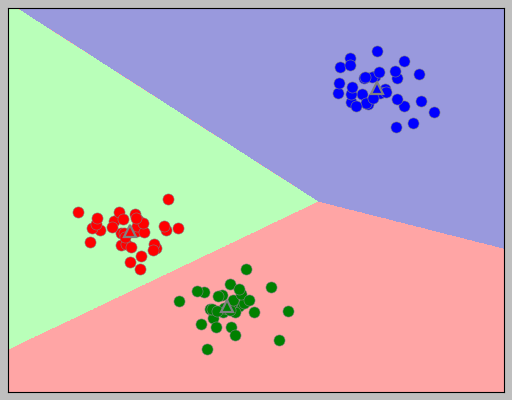

In [4]:
mglearn.plots.plot_kmeans_boundaries()

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [6]:
print("cluster label : \n", kmeans.labels_)

cluster label : 
 [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [7]:
# 예측은 가장 가까운 포인트로 출력함.

# 훈련데이터에 대해서는 label과 predict가 같음
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


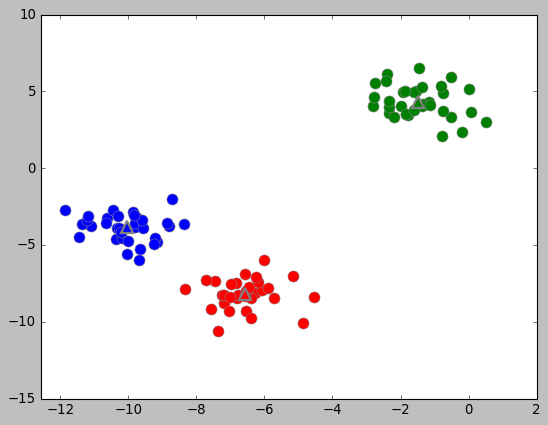

In [8]:
#cluster_centers_에 클래스 순서별로 데이터 포인트가 저장되어 있다.
mglearn.discrete_scatter(X[:,0],X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers='^',
                         markeredgewidth=2)

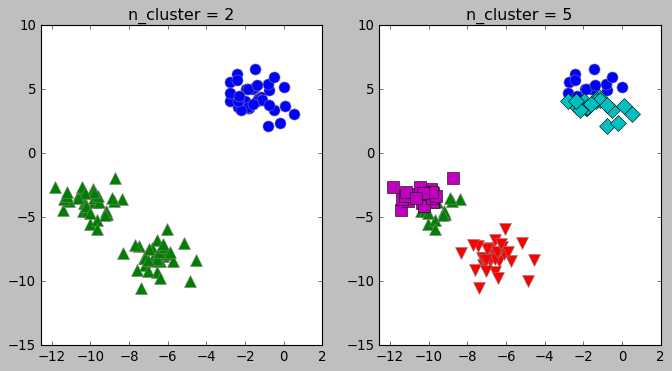

In [9]:
# 클러스트 수를 변경했을 경우
fig, axes = plt.subplots(1,2,figsize = (10,5))
n_clusters = [2,5]
for ax,n in zip(axes, n_clusters)  :
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, ax=ax)
    ax.set_title(f"n_cluster = {n}")

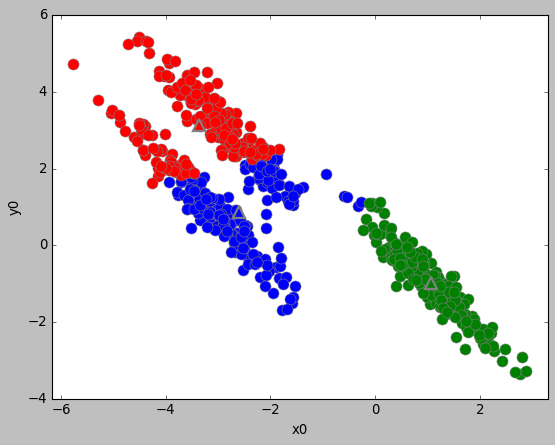

In [10]:
# 원형으로 클러스터를 구분하므로 제대로 인식하지 못한다.

X,y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
                         markers='^', markeredgewidth=2)
plt.xlabel('x0')
plt.ylabel('y0')
plt.show()

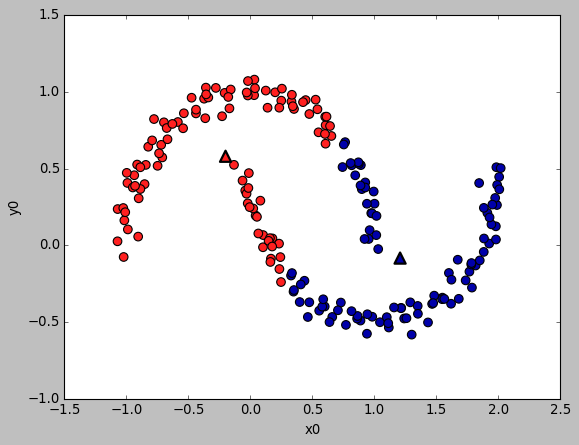

In [11]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap = mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidths=2,
            edgecolors='k')
plt.xlabel('x0')
plt.ylabel('y0')
plt.show()

# 벡터 양자화 또는 분해 메서드로서의 k-평균

### k-평균에서 각각의 클러스터 중심을 하나의 성분으로 보고 분해하는 것을 벡터 양자화라 한다.
## 특징 :

### 입력 데이터의 차원보다 더 많은 클러스터를 사용해 인코딩할 수 있다. 

In [12]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

# 사람마다 최대 50개의 이미지만 사용
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target) :
    # np.where은 조건식의 맞는 index 배열을 반환한다.
    # mask에서 해당 배열의 50번째 까지만 True 로 변환한다.
    mask[np.where(people.target==target)[0][:50]] = True
    
X_people = people.data[mask]
y_people = people.target[mask]

# 흑백 이미지 값(0~255) 를 (0~1)까지로 조정
X_people /= 255
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, 
                                                    stratify=y_people, random_state=42)

In [13]:
from sklearn.decomposition import NMF, PCA

nmf = NMF(n_components=100, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
# nmf에서의 inverse_transform 은 행렬곱을 통해 구현한다.
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_) 

Text(0, 0.5, 'NMF')

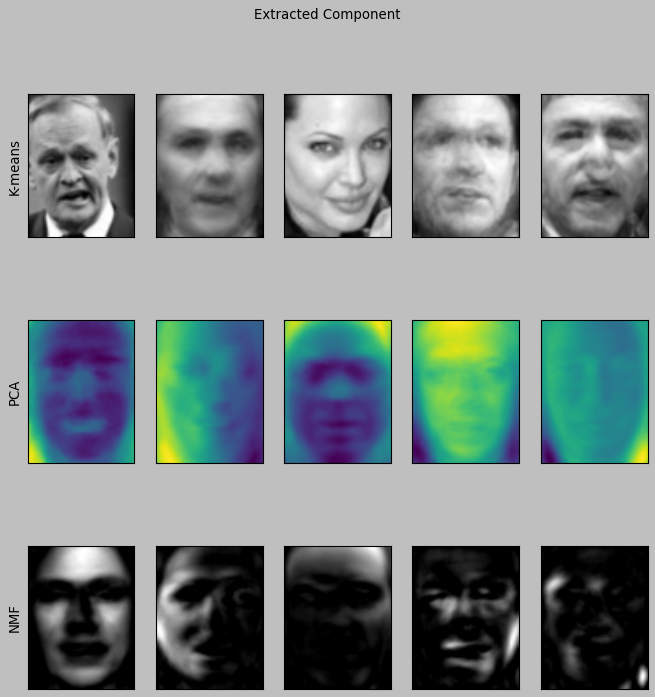

In [19]:
fig, axes = plt.subplots(3,5, figsize =(10,10), subplot_kw={'xticks':(), 'yticks':()})
fig.suptitle("Extracted Component")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_) : 
    ax[0].imshow(comp_kmeans.reshape(image_shape), cmap='gray')
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape), cmap='gray')
    
axes[0,0].set_ylabel("K-means")
axes[1,0].set_ylabel("PCA")
axes[2,0].set_ylabel("NMF")

Text(0, 0.5, 'NMF')

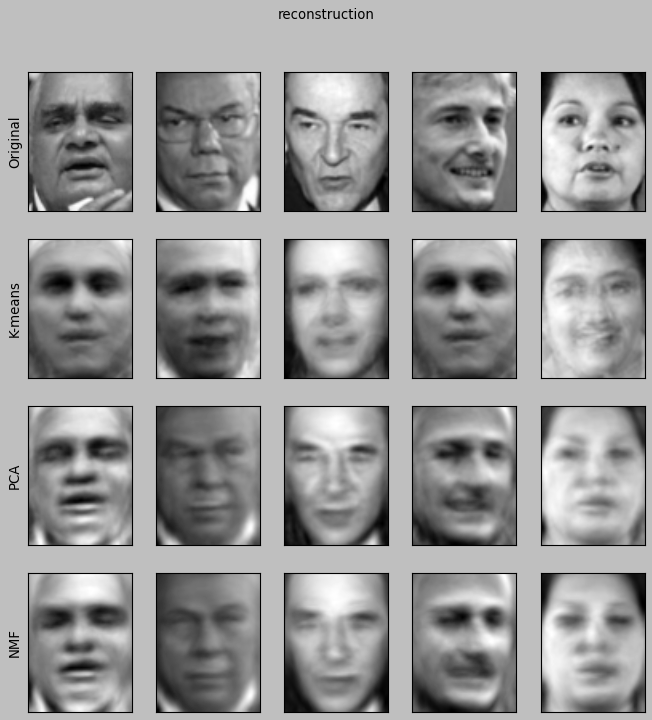

In [21]:
fig, axes = plt.subplots(4,5, subplot_kw={'xticks':(), 'yticks':()}, figsize=(10,10))
fig.suptitle("reconstruction")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans,
                                                  X_reconstructed_pca, X_reconstructed_nmf) :
    ax[0].imshow(orig.reshape(image_shape), cmap='gray')
    ax[1].imshow(rec_kmeans.reshape(image_shape), cmap='gray')
    ax[2].imshow(rec_pca.reshape(image_shape), cmap='gray')
    ax[3].imshow(rec_nmf.reshape(image_shape), cmap='gray')
    
axes[0,0].set_ylabel("Original")
axes[1,0].set_ylabel("K-means")
axes[2,0].set_ylabel("PCA")
axes[3,0].set_ylabel("NMF")


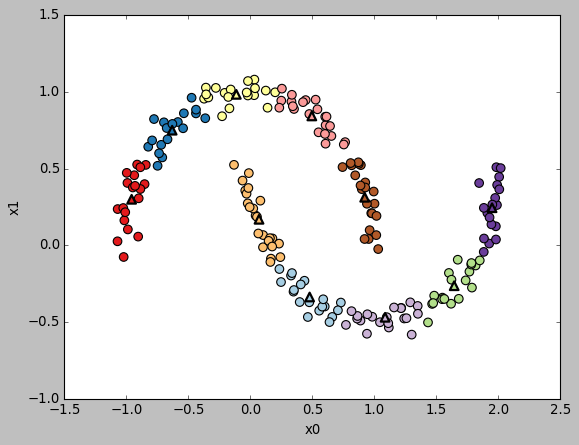

cluster label :
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


In [24]:
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap='Paired', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60, marker='^',
            c=range(kmeans.n_clusters), linewidths=2, cmap='Paired', edgecolors='k')

plt.xlabel("x0")
plt.ylabel("x1")
plt.show()
print("cluster label :\n", y_pred)

## k-평균에서 클러스터의 개수를 정하기
### 이너셔(inertia) : 클러스터 중심에서 클러스터에 속한 각 샘플간의 제곱 거리의 합

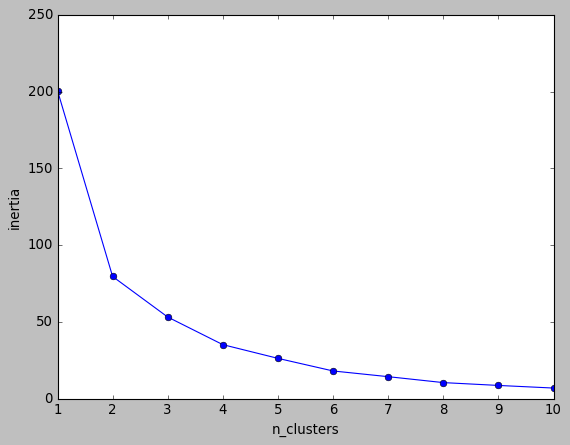

In [27]:
from random import random


inertia = []
for i in range(1,11) :
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("n_clusters")
plt.ylabel('inertia')
plt.show()